<a href="https://colab.research.google.com/github/rajiv1977/AI/blob/main/NeuralNetworkImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**General Neural Network Implementation for Image Processing** \
**Example: Correctly identifying numbers between 0 - 9 on an image**

**Import packages**

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load data**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Understanding the image data format**

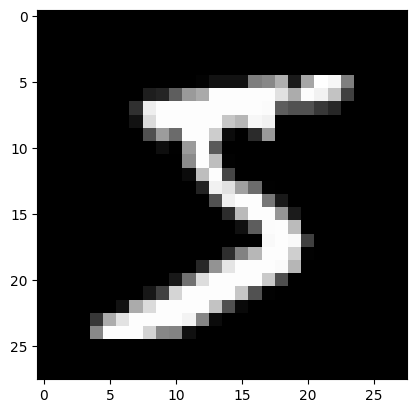

In [3]:
X_train[0].shape
plt.imshow(X_train[0], cmap='gray')

In [4]:
y_train[0]

5

**Preprocessing the image data**

In [5]:
image_height, image_width = 28, 28
X_train = X_train.reshape(X_train.shape[0], image_height * image_width)
X_test = X_test.reshape(X_test.shape[0], image_height * image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


**Rescale**

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Build model**

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [10]:
outcome = model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))
#

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9074 - loss: 0.3069 - val_accuracy: 0.9746 - val_loss: 0.0872
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.9752 - loss: 0.0778 - val_accuracy: 0.9749 - val_loss: 0.0832
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9827 - loss: 0.0533 - val_accuracy: 0.9690 - val_loss: 0.1137
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9884 - loss: 0.0369 - val_accuracy: 0.9767 - val_loss: 0.0890
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9895 - loss: 0.0309 - val_accuracy: 0.9763 - val_loss: 0.0963
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9918 - loss: 0.0233 - val_accuracy: 0.9809 - val_loss: 0.0739
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9793 - val_loss: 0.1003
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9935 -

**What is the accuracy of the model?**

**Plot the accuracy of the training model**

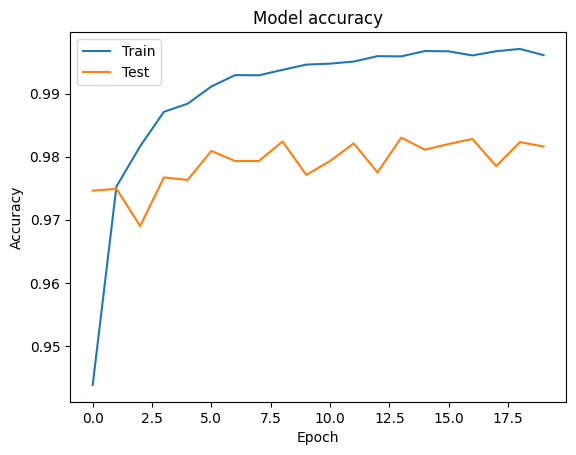

In [11]:
plt.plot(outcome.history['accuracy'])
plt.plot(outcome.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

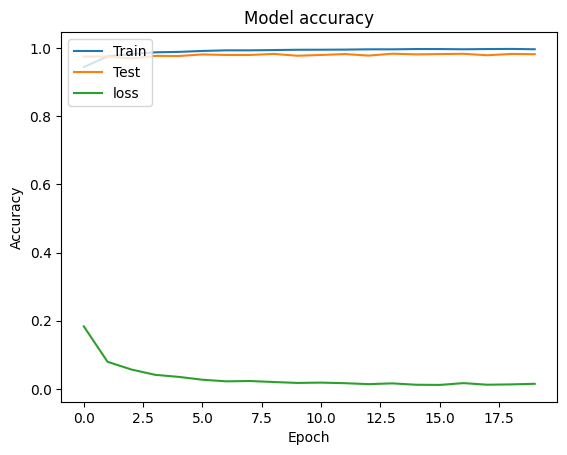

In [12]:
plt.plot(outcome.history['accuracy'])
plt.plot(outcome.history['val_accuracy'])
plt.plot(outcome.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test', 'loss'], loc='upper left')

**Evaluvating the model**

In [13]:
score = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.1677
